In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

##### **Precios de las bebidas no alcóholicas**

Iniciamos analizando los precios de los productos de bebidas no alcóholicas dado que son un producto de consumo masivo presente en todo el territorio nacional.

In [2]:
colores = {
    'Express': 'orange',
    'Market': 'red',
    'Hipermercado Carrefour': 'blue',
}
productos_df = pd.read_csv('productos_procesado.zip', sep='|')

# Al leer el csv las columnas vuelven a ser sus tipos nativos entonces las reconvertimon a categóricas
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype('category')
productos_df['id_producto'] = productos_df['id_producto'].astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')
productos_df['comercio_bandera_nombre'] = productos_df['comercio_bandera_nombre'].astype('category')
productos_df['id_producto_code'] = productos_df['id_producto'].cat.codes

productos_df = productos_df[productos_df['productos_descripcion'].str.contains('^gaseosa|^agua', case=False, na=False)]
display(productos_df.head())
display(productos_df.info())

,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,precio_zscore,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_latitud,sucursales_longitud,sucursales_barrio,sucursales_localidad,sucursales_provincia,comercio_bandera_nombre,localidad_provincia,id_producto_code
14,120,7791813402022,True,AGUA SABORIZADA LIMON S GAS H2OH X 500 CC,1.0,UNI,H2OH!,1400.0,2800.00,500.0,CM3,NaN,NaN,NaN,NaN,0.627199,2,Belgrano Cabildo,Supermercado,-34.558821,-58.459349,NaN,Ciudad Autónoma de Buenos Aires,CABA,Market,Ciudad Autónoma de Buenos Aires - CABA,8305
15,209,7791720029978,True,GASEOSA LIGHT POMELO CARREFOUR CLASSIC PET X2....,1.0,UNI,CARREFOUR CLASSIC,1540.0,684.44,2250.0,CM3,1450.0,Promo A valida desde el 29/04/2025 hasta 06/05...,NaN,NaN,-0.178080,2,Martinez (Libertador),Supermercado,-34.490270,-58.484964,NaN,Martínez,Buenos Aires,Market,Martínez - Buenos Aires,7532
125,258,7790895000997,True,GASEOSA COLA REGULAR COCA COLA PET X 2.25 LT,1.0,UNI,COCA COLA,4200.0,1866.67,2250.0,CM3,NaN,NaN,NaN,NaN,0.327833,2,Villa Pueyrredon,Supermercado,-34.585933,-58.501809,NaN,Ciudad Autónoma de Buenos Aires,CABA,Market,Ciudad Autónoma de Buenos Aires - CABA,5531
182,217,7790895640490,True,AGUA SABORIZADA POMELO SIN GAS AQUARIUS X 1.5 LT,1.0,UNI,AQUARIUS,2100.0,1400.00,1500.0,CM3,NaN,NaN,NaN,NaN,-0.893930,1,Bella Vista,Hipermercado,-34.553106,-58.698256,NaN,San Miguel,Buenos Aires,Hipermercado Carrefour,San Miguel - Buenos Aires,5621
207,477,7791813421603,True,AGUA SABORIZADA CITRUS C GAS H2OH PET X 1.5 LT,1.0,UNI,H2OH!,2159.0,1439.33,1500.0,CM3,NaN,NaN,NaN,NaN,-0.180417,3,E. Pérez 4566,Supermercado,-34.773098,-58.645218,Gonzalez Catan,La Matanza,Buenos Aires,Express,La Matanza - Buenos Aires,8318


<class 'pandas.core.frame.DataFrame'>
Index: 22907 entries, 14 to 849185
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id_sucursal                           22907 non-null  category
 1   id_producto                           22907 non-null  category
 2   productos_ean                         22907 non-null  bool    
 3   productos_descripcion                 22907 non-null  object  
 4   productos_cantidad_presentacion       22907 non-null  float64 
 5   productos_unidad_medida_presentacion  22907 non-null  category
 6   productos_marca                       22907 non-null  category
 7   productos_precio_lista                22907 non-null  float64 
 8   productos_precio_referencia           22907 non-null  float64 
 9   productos_cantidad_referencia         22907 non-null  float64 
 10  productos_unidad_medida_referencia    22907 non-null  category
 11  produ

None

In [3]:
productos_df["id_producto"].nunique()

318

In [4]:
productos_df["id_producto"].value_counts().loc[lambda x: x > 0]

id_producto
7792799000097    126
7790895001000    126
7790895000782    125
7798062547559    125
7791720037294    125
                ... 
7790895006111      3
7791913001477      3
7791913005451      2
7793759320880      2
7798113302076      1
Name: count, Length: 318, dtype: int64

De la última celda podemos analizar que hay productos que estan en todos los tipos de comercio y otros que no.

Para tener un análisis acorde tomamos aquellos productos de bebidas no alcóholicas que están en los tres tipos de comercios.

In [5]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df[productos_df['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 176


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_83590/3562760019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()


### **Análisis de Outliers**

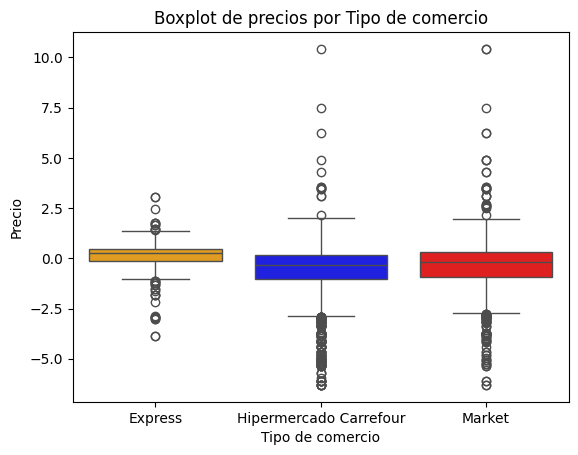

In [6]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

In [7]:
def remove_outliers_iqr(group):
    Q1 = group['precio_zscore'].quantile(0.25)
    Q3 = group['precio_zscore'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['precio_zscore'] >= lower) & (group['precio_zscore'] <= upper)]

# Aplica la función por categoría
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_83590/1922502756.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)
/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_83590/1922502756.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', 

Volvemos a filtrar los productos que están en los 3 tipos de comercio ya que al eliminar outliers se pudo producir que algún producto no esté en todos estos tipos.

In [8]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales[productos_df_en_varias_sucursales['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 171


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_83590/1613971439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()


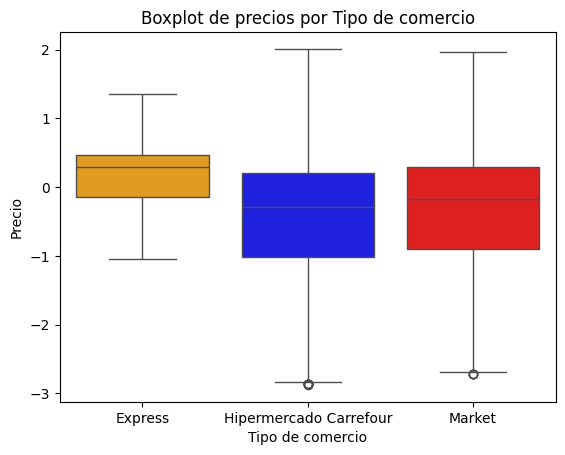

In [9]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

In [10]:
productos_df_en_varias_sucursales['productos_marca'].value_counts().loc[lambda x: x > 0]

productos_marca
CARREFOUR CLASSIC    1766
AQUARIUS             1438
H2OH!                1372
LEVITE               1039
CUNNINGTON            834
PEPSI                 801
CARREFOUR             792
COCA COLA             725
7 UP                  678
PASO DE LOS TOROS     674
VILLAVICENCIO         604
FANTA                 545
SPRITE                533
COCA COLA ZERO        523
BENEDICTINO           518
VILLA DEL SUR         488
GLACIAR               484
COCA COLA LIGHT       481
SPRITE ZERO           377
ECO DE LOS ANDES      346
CRUSH                 345
SCHWEPPES ZERO        334
SMART WATER           277
CELLIER               247
PEPSI LIGHT           237
MIRINDA               221
SCHWEPPES             220
FANTA ZERO            207
NESTLE                179
7UP  LIGHT            114
HYDROBOOST             63
Name: count, dtype: int64

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_83590/2429043445.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = productos_df_en_varias_sucursales.groupby('productos_marca')['precio_zscore'].mean().sort_values()


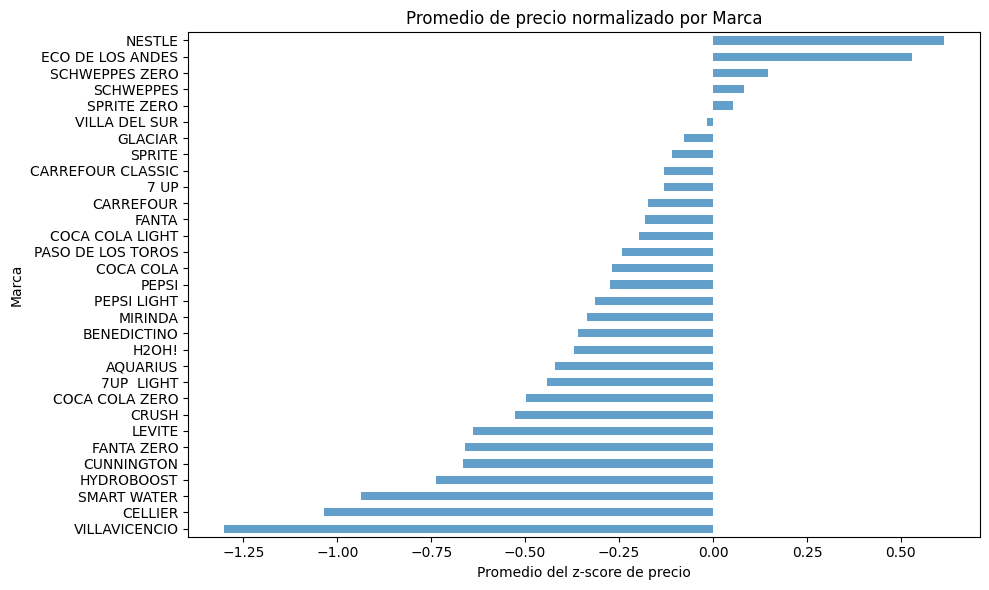

In [11]:
productos_df_en_varias_sucursales['productos_marca'] = productos_df_en_varias_sucursales['productos_marca'].cat.remove_unused_categories()

promedios = productos_df_en_varias_sucursales.groupby('productos_marca')['precio_zscore'].mean().sort_values()
# Hacer el gráfico de barras
promedios.plot(kind='barh', figsize=(10, 6), alpha=0.7)
plt.xlabel('Promedio del z-score de precio')
plt.ylabel('Marca')
plt.title('Promedio de precio normalizado por Marca')
plt.tight_layout()
plt.show()

Analizando este último gráfico se puede observar que las marcas de Carrefour no se encuentran entre las más baratas.